<a href="https://colab.research.google.com/github/Farhanramazainn/FarhanR_MachLearn/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah Pertama Menginstall library Pytesseract untuk OCR di Python dan Menginstall OCR Tesseract versi bahasa Indonesia Sehingga kita bisa menggunakan fitur OCR untuk bahasa Indonesia di script Python menggunakan Pytesseract.

In [16]:
#instal paket tesseract OCR menggunakan apt
!sudo apt install tesseract-ocr
#menginstal pyton memungkinkan menggunakan tessearct OCR langsung dari pyton
!pip install pytesseract
#menginstal bahasa indonesia untuk tesseract OCR
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


Langkah selanjutnya adalah mengimport semua library yang dibutuhkan untuk memanipulasi citra digital (OpenCV), memvisualisasikan citra (Matplotlib), melakukan OCR (Pytesseract), dan mengakses file system (OS).

In [10]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah selanjutnya membaca gambar dari direktori kemudian mengonversi warnanya dari BGR ke RGB, lalu menampilkannya dengan matplotlib dengan judul "Gambar Asli".

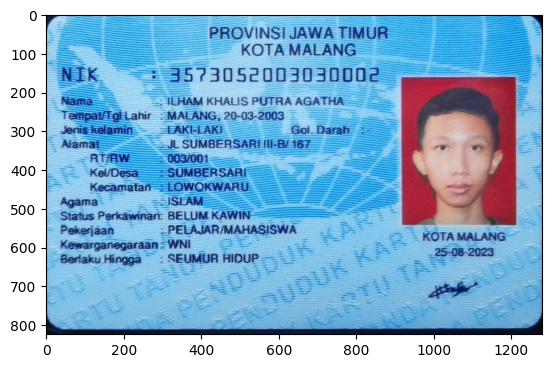

In [36]:
# Plot original image
image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_Kuis2.jpg')
image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)

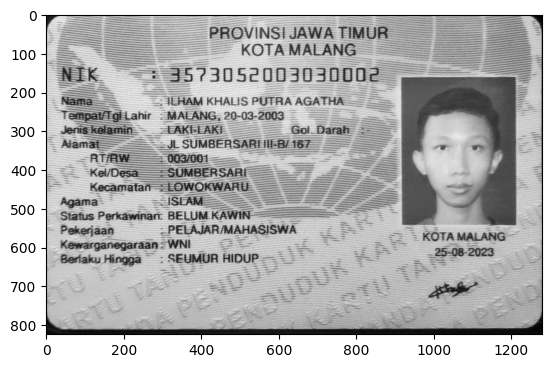

In [37]:
# Preprocess image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [38]:
#melakukan thresholding citra skala abu-abu
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

In [39]:
result = pytesseract.image_to_string((threshed), lang='ind')
result

' \n\nPROVINSI JAWA TIMUR\nKOTA MALANG\n\n3573052093939002\n\nILHAM KHAL!S PUTRA AGATHA\n: MALANG, 20-03-2003\n»5AKI-LAKI Goi. Darah :-\n— JL SUMBERSARI !11-8/ 167\n\n  \n   \n \n     \n\nStatus Perkawinan: BELUM KAWIN\nPekerjaan : PELAJAR/MAHASISWA\n\nKewarganegaraan: WNI KOTA MALANG\nBerlaku Hingga”: SEUMUR HIDUP 1 1 25-08-2023\n\x0c'

In [40]:
#iterasi melalui setiap kata dalam teks hasil ekstraksi berdasarkan baris baru
for word in result.split('\n'):
    if "``_" in word:
        word = word.replace("''_", ":")

    #apakah kata tersebut mengandung "NIK"
    if "NIK" in word:
        nik_chars = word.split()
        for i in range(len(nik_chars)):
            if "D" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("D", "0")
            if "?" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("?", "7")

        word = ' '.join(nik_chars)

    print(word)

 

PROVINSI JAWA TIMUR
KOTA MALANG

3573052093939002

ILHAM KHAL!S PUTRA AGATHA
: MALANG, 20-03-2003
»5AKI-LAKI Goi. Darah :-
— JL SUMBERSARI !11-8/ 167

  
   
 
     

Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan: WNI KOTA MALANG
Berlaku Hingga”: SEUMUR HIDUP 1 1 25-08-2023

